In [90]:
from sklearn.datasets.samples_generator import make_blobs 
import matplotlib.pyplot as plt  
import numpy as np 
from pandas import DataFrame 
from sklearn import linear_model
import seaborn as sns
%matplotlib inline  

In [96]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

In [100]:
df['label']

0     0
1     1
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    0
12    1
13    0
14    1
15    1
16    1
17    0
18    0
19    1
20    1
21    1
22    1
23    0
24    0
25    1
26    1
27    0
28    0
29    1
     ..
70    1
71    1
72    1
73    0
74    0
75    0
76    1
77    1
78    0
79    0
80    0
81    1
82    0
83    1
84    0
85    0
86    0
87    0
88    0
89    0
90    1
91    0
92    0
93    0
94    1
95    1
96    1
97    0
98    1
99    0
Name: label, Length: 100, dtype: int64

In [102]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    return plt

def color(x):
    if x.all():
        return 'red'
    else:
        return 'blue'

y = list(map(color, list(y)))

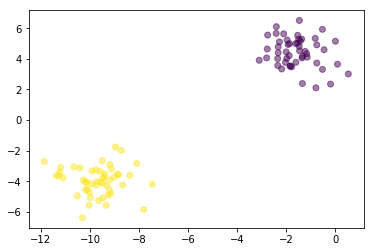

In [103]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)

/home/rafa/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


<module 'matplotlib.pyplot' from '/home/rafa/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

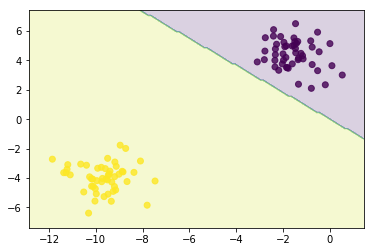

In [107]:
plot_decision_boundaries(X,y,linear_model.SGDClassifier)